In [28]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [29]:
#loading data set
df = pd.read_csv("data.csv")

df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [30]:
#2. Linear Regression

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# a) Importing the datasets

salaryData = pd.read_csv('Salary_Data.csv')

#excluding last column
X = salaryData.iloc[:, :-1].values
#salary
Y = salaryData.iloc[:, 1].values

salaryData.info()
salaryData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [31]:
#b) Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

print("Below is the Split Data:")
print("Train features:")
print(pd.DataFrame(X_train).head())

print("Train targets:")
print(pd.DataFrame(Y_train).head())

print("Test features:")
print(pd.DataFrame(X_test).head())

print("Test targets:")
print(pd.DataFrame(Y_test).head())

Below is the Split Data:
Train features:
     0
0  2.9
1  5.1
2  3.2
3  4.5
4  8.2
Train targets:
          0
0   56642.0
1   66029.0
2   64445.0
3   61111.0
4  113812.0
Test features:
      0
0   1.5
1  10.3
2   4.1
3   3.9
4   9.5
Test targets:
          0
0   37731.0
1  122391.0
2   57081.0
3   63218.0
4  116969.0


In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM-based architecture
def create_lstm_model(input_shape, num_units=50):
    model = Sequential([
        LSTM(num_units, input_shape=input_shape),
        Dense(1)  # Output layer with 1 neuron for regression task
    ])
    return model

# Example usage:
# Assuming input_shape is the shape of your input sequences (e.g., (10, 1) for sequences of length 10 with 1 feature)
input_shape = (10, 1)  # Example input shape
num_units = 50  # Number of LSTM units

# Create the LSTM model
model = create_lstm_model(input_shape, num_units)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_193 (LSTM)             (None, 50)                10400     
                                                                 
 dense_97 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the function to create LSTM-based model with multiple layers
def create_stacked_lstm_model(input_shape, num_units_per_layer):
    model = Sequential()
    for i, num_units in enumerate(num_units_per_layer):
        if i == 0:
            model.add(LSTM(num_units, input_shape=input_shape, return_sequences=True))
        elif i == len(num_units_per_layer) - 1:
            model.add(LSTM(num_units))
        else:
            model.add(LSTM(num_units, return_sequences=True))
    model.add(Dense(1))  # Output layer with 1 neuron for regression task
    return model

# Example usage:
input_shape = (10, 1)  # Example input shape
num_units_per_layer = [50, 50, 50]  # Number of units per layer

# Create the stacked LSTM model
model = create_stacked_lstm_model(input_shape, num_units_per_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_194 (LSTM)             (None, 10, 50)            10400     
                                                                 
 lstm_195 (LSTM)             (None, 10, 50)            20200     
                                                                 
 lstm_196 (LSTM)             (None, 50)                20200     
                                                                 
 dense_98 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the function to create LSTM-based model with dropout layers
def create_lstm_with_dropout_model(input_shape, num_units, dropout_rate=0.2):
    model = Sequential([
        LSTM(num_units, input_shape=input_shape, return_sequences=True),
        Dropout(dropout_rate),  # Add dropout layer after LSTM layer
        LSTM(num_units),
        Dropout(dropout_rate),  # Add dropout layer after LSTM layer
        Dense(1)  # Output layer with 1 neuron for regression task
    ])
    return model

# Example usage:
input_shape = (10, 1)  # Example input shape
num_units = 50  # Number of units in LSTM layers
dropout_rate = 0.2  # Dropout rate

# Create the LSTM model with dropout layers
model = create_lstm_with_dropout_model(input_shape, num_units, dropout_rate)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_197 (LSTM)             (None, 10, 50)            10400     
                                                                 
 dropout_188 (Dropout)       (None, 10, 50)            0         
                                                                 
 lstm_198 (LSTM)             (None, 50)                20200     
                                                                 
 dropout_189 (Dropout)       (None, 50)                0         
                                                                 
 dense_99 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the function to create LSTM-based model
def create_lstm_model(input_shape, num_units):
    model = Sequential([
        LSTM(num_units, input_shape=input_shape),
        Dense(1)  # Output layer with 1 neuron for regression task
    ])
    return model

# Example usage:
input_shape = (10, 1)  # Example input shape
num_units = 50  # Number of units in LSTM layer

# Create the LSTM model
model = create_lstm_model(input_shape, num_units)

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_199 (LSTM)             (None, 50)                10400     
                                                                 
 dense_100 (Dense)           (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 5858979840.0000 - val_loss: 4766294528.0000
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 5858977792.0000 - val_loss: 4766291968.0000
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 5858974208.0000 - val_loss: 4766289920.0000
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 5858971648.0000 - val_loss: 4766286848.0000
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 5858968576.0000 - val_loss: 4766284288.0000
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 5858965504.0000 - val_loss: 4766281728.0000
Epoch 7/100
1/1 [==============================] - 0s 65ms/step - loss: 5858962432.0000 - val_loss: 4766279168.0000
Epoch 8/100
1/1 [==============================] - 0s 41ms/step - loss: 5858959360.0000 - val_loss: 4766276608.0000
Epoch 9/100
1/1 [==============================] - 0s 38ms/step - loss: 58

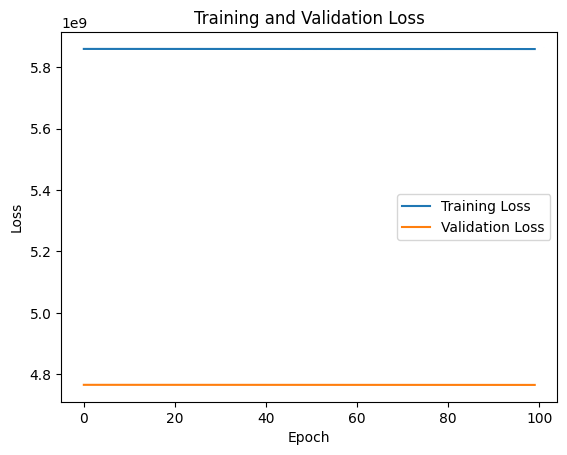

In [36]:
# Assuming you have already defined and compiled the LSTM model (model) and prepared the training data (X_train, y_train)

# Train the model on the training set for a fixed number of epochs
num_epochs = 100  # Example number of epochs

history = model.fit(X_train, Y_train, epochs=num_epochs, batch_size=32, validation_split=0.2)

# Plot training and validation loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Epoch 1/100
1/1 [==============================] - 0s 172ms/step - loss: 5858604032.0000 - val_loss: 4765972992.0000
Epoch 2/100
1/1 [==============================] - 0s 56ms/step - loss: 5858598400.0000 - val_loss: 4765968896.0000
Epoch 3/100
1/1 [==============================] - 0s 75ms/step - loss: 5858592768.0000 - val_loss: 4765964288.0000
Epoch 4/100
1/1 [==============================] - 0s 68ms/step - loss: 5858587648.0000 - val_loss: 4765959168.0000
Epoch 5/100
1/1 [==============================] - 0s 49ms/step - loss: 5858582016.0000 - val_loss: 4765955072.0000
Epoch 6/100
1/1 [==============================] - 0s 75ms/step - loss: 5858576896.0000 - val_loss: 4765949952.0000
Epoch 7/100
1/1 [==============================] - 0s 81ms/step - loss: 5858571264.0000 - val_loss: 4765945344.0000
Epoch 8/100
1/1 [==============================] - 0s 51ms/step - loss: 5858566144.0000 - val_loss: 4765940736.0000
Epoch 9/100
1/1 [==============================] - 0s 48ms/step - loss:

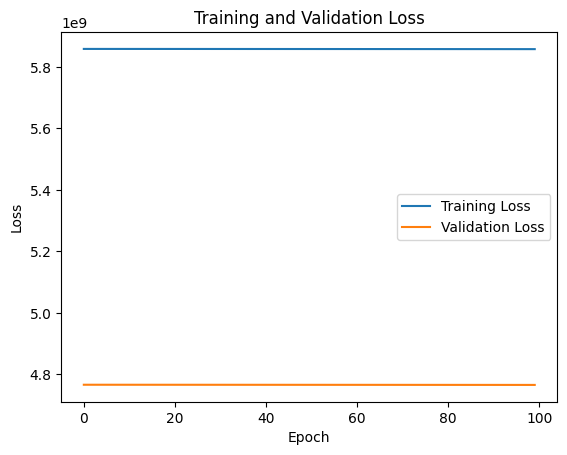

In [37]:
# Train the model on the training set for a fixed number of epochs
num_epochs = 100  # Example number of epochs

history = model.fit(X_train, Y_train, epochs=num_epochs, batch_size=32, validation_split=0.2, verbose=1)

# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss curves
import matplotlib.pyplot as plt

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [38]:
# Evaluate the trained model on the test set
test_loss = model.evaluate(X_test, Y_test)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics (e.g., MAE, RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

print("Test Loss:", test_loss)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


1/1 [==============================] - 0s 430ms/step
Test Loss: 8226586624.0
Mean Absolute Error (MAE): 85956.31352493764
Root Mean Squared Error (RMSE): 90700.53276170942


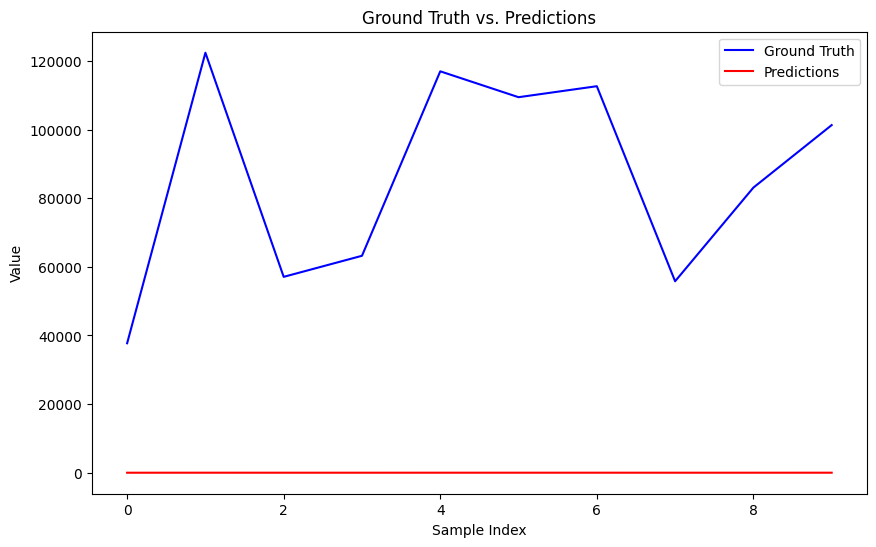

In [39]:
import matplotlib.pyplot as plt

# Plot the ground truth vs. predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='Ground Truth', color='blue')
plt.plot(y_pred, label='Predictions', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Ground Truth vs. Predictions')
plt.legend()
plt.show()


In [44]:

def hyperparameter_tuning(data_path, seq_length, num_epochs, learning_rate, num_units, num_layers, dropout_rate):
    # Prepare dataset
    X_train, X_test, y_train, y_test, scaler = prepare_dataset(data_path, seq_length)
    # Split validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
    # Create and train LSTM model
    model = create_lstm_model(input_shape=X_train.shape[1:], num_units=num_units, num_layers=num_layers, dropout_rate=dropout_rate)
    history = train_lstm_model(model, X_train, Y_train, X_val, y_val, num_epochs, learning_rate)
    # Evaluate model
    mae, rmse, _ = evaluate_lstm_model(model, X_test, Y_test, scaler)
    return mae, rmse, history